# Ujian Akhir Semester - Machine Learning
Oleh:
- **5210411117** - Nendy Nailul Autor
- **5210411135** - I Gede Widiantara

## Pendahuluan
Projek ini dibuat untuk memenuhi Ujian Akhir Semester Machine Learning, topik yang dibahas ialah mengenai kesehatan, yang dibuat untuk mengklasifikasikan orang yang beresiko terkena penyakit stroke atau tidak. Model Machine Learning yang digunakan adalah **K-Nearest Neighbors** dan **Decision Tree**

## Import Package yang Diperlukan

In [706]:
# Untuk visualisasi data
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import seaborn as sns

# Untuk pengolahan data
import pandas as pd
import numpy as np

# Untuk pembuatan model
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Untuk evaluasi model
from sklearn.metrics import confusion_matrix, classification_report

## Mengenai Dataset
Terdapat 2 dataset terpisah antara label dan fiturnya yang digunakan pada projek ini, yaitu:
1. fitur_dataset.csv --> berisikan seluruh data fitur clean mengenai hal-hal yang mempengaruhi penyakit stroke
2. label_dataset.csv --> berisikan label dari fitur_dataset.csv

In [707]:
fitur = pd.read_csv('D:\Code\py_code\Machine-Learning/5210411135\data\data_uas/fitur_dataset.csv', index_col=0)
label = pd.read_csv('D:\Code\py_code\Machine-Learning/5210411135\data\data_uas\label_dataset.csv', index_col=0)

#### 1. Dataset Fitur

In [708]:
fitur.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.816895,0.0,1.0,0.801265,0.301260,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.743652,0.0,0.0,0.679023,0.234135,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.975586,0.0,1.0,0.234512,0.254296,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.597168,0.0,0.0,0.536008,0.276060,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.963379,1.0,0.0,0.549349,0.156930,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [709]:
fitur.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9722 entries, 0 to 9721
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             9722 non-null   float64
 1   hypertension                    9722 non-null   float64
 2   heart_disease                   9722 non-null   float64
 3   avg_glucose_level               9722 non-null   float64
 4   bmi                             9722 non-null   float64
 5   gender_Female                   9722 non-null   float64
 6   gender_Male                     9722 non-null   float64
 7   gender_Other                    9722 non-null   float64
 8   ever_married_No                 9722 non-null   float64
 9   ever_married_Yes                9722 non-null   float64
 10  work_type_Govt_job              9722 non-null   float64
 11  work_type_Never_worked          9722 non-null   float64
 12  work_type_Private               9722 no

**Penjelasan:**<br>
Berdasarkan hasil `fitur.info()` dapat diketahui dataset fitur memiliki **21 kolom** yang berisikan **9722 data** yang bertipe **float**
<br><br>
**Detail:**<br>
- `age` --> Umur Pasien
- `hypertension` --> Menyatakan Pasien memiliki hipertensi (1) atau tidak (0)
- `avg_glucose_level` --> Nilai kandungan rata-rata glukosa dalan darah
- `bmi` --> Body Mass Index
- Terdapat **data kategori** `gender` yang menyatakan **jenis kelamin** pada dataset ini, namun sudah diubah menjadi data numerik biner ke dalam 3 kolom : *gender_Female*, *gender_Male*, *gender_Other*
- Terdapat **data kategori** `ever_married` yang menyatakan **status menikah** pada dataset ini, namun sudah diubah menjadi data numerik biner ke dalam 2 kolom : *ever_married_No*, *ever_married_Yes*
- Terdapat **data kategori** `work_type` yang menyatakan **tipe pekerjaan** pada dataset ini, namun sudah diubah menjadi data numerik biner ke dalam 4 kolom : *work_type_Govt_job*, *work_type_Never_worked*, *work_type_Private*, *work_type_Self-employed*, *work_type_children* 
- Terdapat **data kategori** `Residence_type` yang menyatakan **tipe tempat tinggal** pada dataset ini, namun sudah diubah menjadi data numerik biner ke dalam 2 kolom : *Residence_type_Rural*, *Residence_type_Urban*
- Terdapat **data kategori** `smoking_status` yang menyatakan **tipe kebiasaan merokok** pada dataset ini, namun sudah diubah menjadi data numerik biner ke dalam 4 kolom : *smoking_status_Unknown*, *smoking_status_formerly smoked*, *smoking_status_never smoked*, *smoking_status_smokes*

In [710]:
fitur.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,9722.000000,9722.000000,9722.000000,9722.000000,9722.000000,9722.000000,9722.000000,9722.000000,9722.000000,9722.000000,...,9722.000000,9722.000000,9722.000000,9722.000000,9722.000000,9722.000000,9722.000000,9722.000000,9722.000000,9722.000000
mean,0.672093,0.165914,0.102046,0.288946,0.221051,0.573179,0.426718,0.000103,0.224371,0.775629,...,0.002263,0.599302,0.206531,0.072234,0.475326,0.524674,0.247524,0.227021,0.371948,0.153507
std,0.266303,0.351766,0.282737,0.234404,0.075248,0.492841,0.492826,0.010142,0.412489,0.412489,...,0.047519,0.484268,0.399364,0.258148,0.496734,0.496734,0.427715,0.414562,0.479747,0.355922
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.511719,0.000000,0.000000,0.115874,0.176391,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.739587,0.000000,0.000000,0.202891,0.215349,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.894619,0.000000,0.000000,0.407974,0.258877,1.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.326823,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Penjelasan:**<br>
Berdasarkan hasil `fitur.describe()` dapat diketahui semua data pada dataset fitur sudah melewati proses normalisasi. Hal ini dapat dilihat pada nilai **min = 0** dan **max = 1**

#### 2. Dataset Label

In [711]:
label.head()

,Stroke
0,1
1,1
2,1
3,1
4,1


In [712]:
label.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9722 entries, 0 to 9721
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Stroke  9722 non-null   int64
dtypes: int64(1)
memory usage: 151.9 KB


**Penjelasan:**<br>
Berdasarkan hasil `fitur.info()` dapat diketahui dataset fitur memiliki **1 kolom** yang berisikan **9722 data** yang bertipe **int**

In [713]:
label.describe()

,Stroke
count,9722.000000
mean,0.500000
std,0.500026
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


## Data Preprocessing

#### Menggabungkan dataset fitur dan label menjadi dataset utuh

In [714]:
dataset = pd.concat([fitur, label], axis=1)
dataset.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,Stroke
0,0.816895,0.0,1.0,0.801265,0.301260,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1
1,0.743652,0.0,0.0,0.679023,0.234135,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
2,0.975586,0.0,1.0,0.234512,0.254296,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
3,0.597168,0.0,0.0,0.536008,0.276060,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
4,0.963379,1.0,0.0,0.549349,0.156930,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1


#### Pengecekan Data Kosong

In [715]:
dataset.isna().sum()

age                               0
hypertension                      0
heart_disease                     0
avg_glucose_level                 0
bmi                               0
gender_Female                     0
gender_Male                       0
gender_Other                      0
ever_married_No                   0
ever_married_Yes                  0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
Residence_type_Rural              0
Residence_type_Urban              0
smoking_status_Unknown            0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
Stroke                            0
dtype: int64

#### Memilih X Fitur dan Y label

In [716]:
X = dataset.iloc[:,:-1]
Y = dataset.iloc[:,-1]

#### Pengecekan Keseimbangan Data Label

In [717]:
print(f"Label '1': {sum(Y==1)}")
print(f"Label '0': {sum(Y==0)}")

Label '1': 4861
Label '0': 4861


#### Melakukan pembagian data training dan data testing

In [718]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
dimensi = f'dimensi x_train\t: {x_train.shape}\ndimensi x_test\t: {x_test.shape}\ndimensi y_train\t: {y_train.shape}\ndimensi y_test\t: {y_test.shape}\n'
print(dimensi)

dimensi x_train	: (7777, 21)
dimensi x_test	: (1945, 21)
dimensi y_train	: (7777,)
dimensi y_test	: (1945,)



In [719]:
x_train

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
5377,0.723648,0.000000,0.298617,0.593693,0.244417,1.0,0.0,0.0,0.0,1.0,...,0.0,1.000000,0.000000,0.0,0.0,1.0,0.0,0.000000,1.0,0.000000
6692,0.894366,0.000000,0.000000,0.463783,0.289752,0.0,1.0,0.0,0.0,1.0,...,0.0,1.000000,0.000000,0.0,1.0,0.0,0.0,0.000000,1.0,0.000000
4996,0.487305,0.000000,0.000000,0.179346,0.152348,1.0,0.0,0.0,0.0,1.0,...,0.0,1.000000,0.000000,0.0,0.0,1.0,0.0,0.000000,1.0,0.000000
1561,0.755859,1.000000,1.000000,0.317745,0.280641,0.0,1.0,0.0,0.0,1.0,...,0.0,1.000000,0.000000,0.0,0.0,1.0,0.0,1.000000,0.0,0.000000
2114,0.353027,0.000000,0.000000,0.120395,0.145475,1.0,0.0,0.0,0.0,1.0,...,0.0,1.000000,0.000000,0.0,0.0,1.0,1.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0.895875,0.387724,0.000000,0.693811,0.175121,0.0,1.0,0.0,0.0,1.0,...,0.0,0.000000,0.000000,0.0,0.0,1.0,0.0,0.612276,0.0,0.387724
5191,0.823120,1.000000,0.000000,0.101552,0.212498,0.0,1.0,0.0,0.0,1.0,...,0.0,0.500477,0.000000,0.0,0.0,1.0,0.0,1.000000,0.0,0.000000
5390,0.963153,0.000000,0.327153,0.109196,0.105780,1.0,0.0,0.0,0.0,1.0,...,0.0,0.672847,0.327153,0.0,1.0,0.0,1.0,0.000000,0.0,0.000000
860,0.560547,0.000000,0.000000,0.207876,0.458190,1.0,0.0,0.0,0.0,1.0,...,0.0,1.000000,0.000000,0.0,1.0,0.0,0.0,0.000000,0.0,1.000000


## Pembuatan Model

#### Pembuatan Fungsi untuk visualisasi Confussion Matrix

In [720]:
def plot_cm(matrix, title): 
    ax = plt.subplot()
    sns.heatmap(matrix, annot=True, fmt='g', ax=ax, cmap=sns.cubehelix_palette(as_cmap=True))

    ax.set_title(f'Confusion Matrix {title}', pad=10);
    ax.xaxis.set_ticklabels(['Healty', 'Stroke']);ax.yaxis.set_ticklabels(['Healty', 'Stroke'])
    plt.show()

#### Pembuatan Model K-Nearest Neighbors

In [721]:
# Pembuatan Model
model_knn = KNeighborsClassifier()
model_knn.fit(x_train, y_train)

KNeighborsClassifier()

In [722]:
# Menentukan Prediksi dengan Model
y_pred_knn = model_knn.predict(x_test)
y_pred_knn

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [723]:
# Menyimpan Confusion Matrix K-Nearest Neighbors
knn_cf = confusion_matrix(y_test, y_pred_knn)

#### Pembuatan Model Decision Tree

In [724]:
# Pembuatan Model
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [725]:
# Menentukan Prediksi dengan Model
y_pred_dt = dt.predict(x_test)
y_pred_dt

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [726]:
# Menyimpan Confusion Matrix Decision Tree
dt_cf = confusion_matrix(y_test, y_pred_dt)

## Hasil dan Analisis

#### Hasil Model K-Nearest Neighbors

In [727]:
knn_report = classification_report(y_test, y_pred_knn, output_dict=True, target_names=['Healthy',"Stroke"])
pd.DataFrame(knn_report).transpose()

,precision,recall,f1-score,support
Healthy,0.964200,0.828718,0.891340,975.000000
Stroke,0.849142,0.969072,0.905152,970.000000
accuracy,0.898715,0.898715,0.898715,0.898715
macro avg,0.906671,0.898895,0.898246,1945.000000
weighted avg,0.906819,0.898715,0.898228,1945.000000


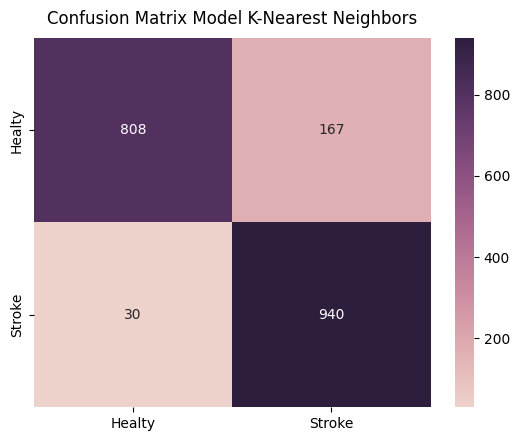

In [728]:
plot_cm(knn_cf, 'Model K-Nearest Neighbors')

#### Hasil Model Decision Tree 

In [729]:
dt_report = classification_report(y_test, y_pred_dt, output_dict=True, target_names=['Healthy',"Stroke"])
pd.DataFrame(dt_report).transpose()

,precision,recall,f1-score,support
Healthy,0.901274,0.870769,0.885759,975.000000
Stroke,0.874377,0.904124,0.889002,970.000000
accuracy,0.887404,0.887404,0.887404,0.887404
macro avg,0.887825,0.887446,0.887380,1945.000000
weighted avg,0.887860,0.887404,0.887376,1945.000000


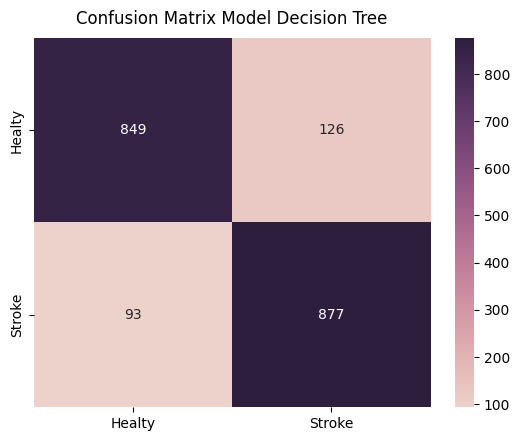

In [730]:
plot_cm(dt_cf, 'Model Decision Tree')

#### Analisis

In [731]:
report = [knn_report, dt_report]
result = {'accuracy' : [],
        'precision_0' : [],
        'recall_0' : [],
        'f1-score_0' : [],
        'precision_1' : [],
        'recall_1' : [],
        'f1-score_1' : [],}

for data in report:
    result['accuracy'].append(data['accuracy'])
    result['precision_0'].append(data['Healthy']['precision'])
    result['recall_0'].append(data['Healthy']['recall'])
    result['f1-score_0'].append(data['Healthy']['f1-score'])
    result['precision_1'].append(data['Stroke']['precision'])
    result['recall_1'].append(data['Stroke']['recall'])
    result['f1-score_1'].append(data['Stroke']['f1-score'])

metrics = pd.DataFrame(result, index=['Model K-Nearest Neighbors','Model Decision Tree'])

multiheader = [('','accuracy'),
               ('Healthy', 'precision'),
               ('Healthy', 'recall'),
               ('Healthy', 'f1-score'),
               ('Stroke', 'precision'),
               ('Stroke', 'recall'),
               ('Stroke', 'f1-score')]

metrics.columns = pd.MultiIndex.from_tuples(multiheader)

metrics

Healthy                        Stroke   
                           accuracy precision    recall  f1-score precision   
Model K-Nearest Neighbors  0.898715  0.964200  0.828718  0.891340  0.849142  \
Model Decision Tree        0.887404  0.901274  0.870769  0.885759  0.874377   

                                               
                             recall  f1-score  
Model K-Nearest Neighbors  0.969072  0.905152  
Model Decision Tree        0.904124  0.889002

**Penjelasan:**<br>
Dari kedua hasil visualisasi prediksi dengan confussion matrix diatas, kita dapat melihat bahwa performa masing-masing model sudah cukup baik, namun pada model pertama atau model yang menggunakan algoritma K-Nearest Neighbors memiliki performa yang cukup baik dibandingkan dengan model kedua yang menggunakan algoritma Decsision Tree

In [732]:
# Pembuatan File CSV
metrics.to_csv("117_135_UAS_MachineLearning_Hasil_akhir.csv", index=True)

## Penutupan

Projek untuk membuat Model memprediksi orang yang beresiko terkena penyakit stroke atau tidak telah selesai dibuat dan model ini dapat digunakan untuk memprediksi data sebenarnya. Namun demikian beberapa pengembangan lain masih dapat dilakukan agar membuat model yang memiliki akurasi lebih tinggi.


#### *Referensi*
- Dokumentasi scikit-learn : https://scikit-learn.org/stable/modules/classes.html
- Lainnya :
  - https://colab.research.google.com/drive/1D9zVTdMlH78DEAboLjkY1aXNctA-p4ZL#scrollTo=CIs2z-AAjyaL